In [1]:
import pandas as pd
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [4]:
lab_to_sentiment = {0:0, 4:1}
def label_decoder(label):
    return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))

<AxesSubplot:xlabel='sentiment', ylabel='count'>

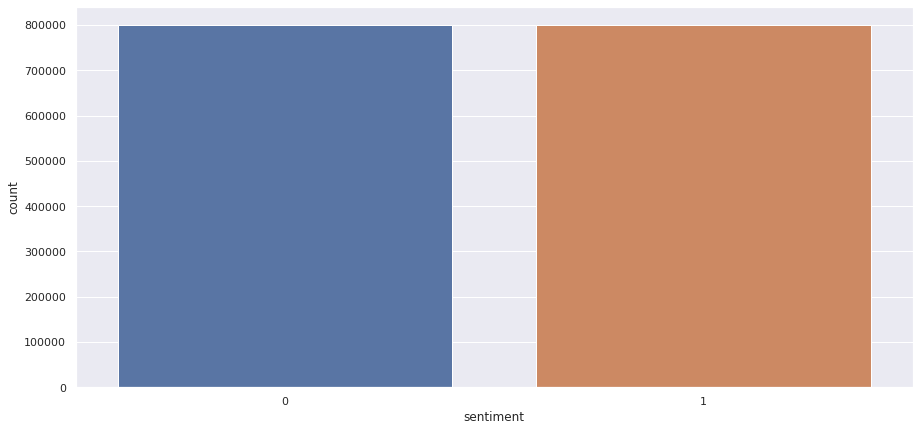

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x=df.sentiment)

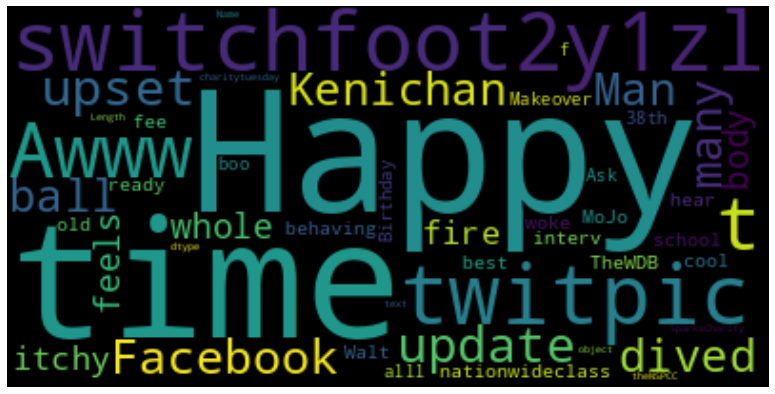

In [6]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black").generate(str(df['text']))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
import nltk
import string
import re
from nltk.corpus import stopwords

In [8]:
def data_preprocessing(data):
    ###Here we remove all trash in our text
    prep1 = data.lower()
    prep2 = re.sub('https?://\S+|www\.\S+', '', data)
    prep3 = re.sub('\\W', ' ', data)
    prep4 = re.sub('\n', '', data)
    prep5 = re.sub(' +', ' ', data)
    prep6 = re.sub('^ ', '', data)
    prep7 = re.sub(' $', '', data)
    return data

In [9]:
df['text'].apply(data_preprocessing)

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'to'),
  Text(1, 0, 'I'),
  Text(2, 0, 'the'),
  Text(3, 0, 'a'),
  Text(4, 0, 'my'),
  Text(5, 0, 'and'),
  Text(6, 0, 'i'),
  Text(7, 0, 'is'),
  Text(8, 0, 'you'),
  Text(9, 0, 'for'),
  Text(10, 0, 'in'),
  Text(11, 0, 'of'),
  Text(12, 0, 'it'),
  Text(13, 0, 'on'),
  Text(14, 0, 'have'),
  Text(15, 0, 'so'),
  Text(16, 0, 'me'),
  Text(17, 0, 'that'),
  Text(18, 0, 'with'),
  Text(19, 0, 'be'),
  Text(20, 0, 'but'),
  Text(21, 0, 'at'),
  Text(22, 0, "I'm"),
  Text(23, 0, 'was'),
  Text(24, 0, 'just'),
  Text(25, 0, 'not'),
  Text(26, 0, 'this'),
  Text(27, 0, 'get'),
  Text(28, 0, 'like'),
  Text(29, 0, 'are'),
  Text(30, 0, 'up'),
  Text(31, 0, 'all'),
  Text(32, 0, '-'),
  Text(33, 0, 'out'),
  Text(34, 0, 'go'),
  Text(35, 0, 'your'),
  Text

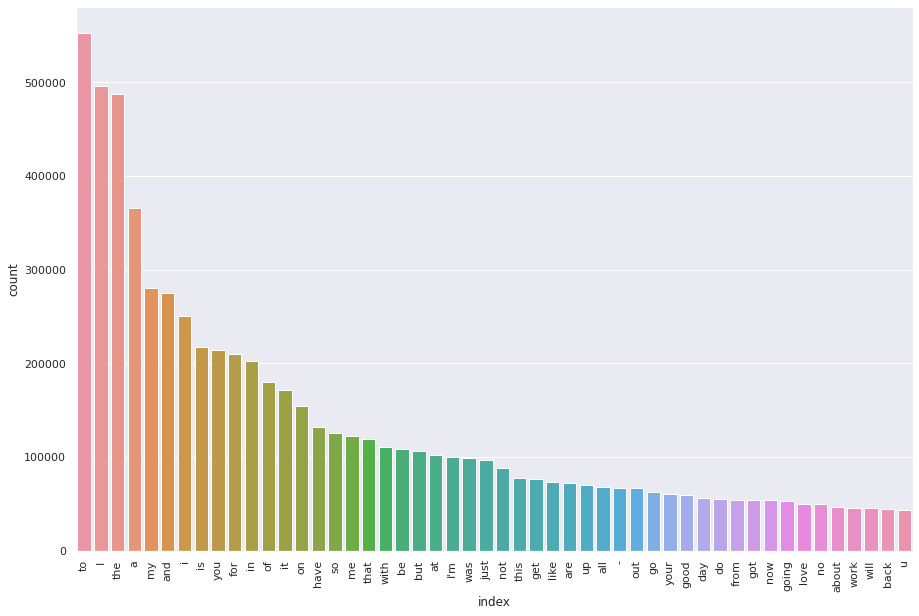

In [10]:
from itertools import chain
from collections import Counter
split_words = df['text'].str.split()
list_split_words = list(chain(*split_words))

count_word= Counter(list_split_words)
df_ = pd.DataFrame(data=count_word, index=['count'])
most_frequency_words = df_.T.sort_values(by=['count'], ascending=False).reset_index().head(50)

plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=most_frequency_words)
plt.xticks(rotation=90)

In [11]:
stop = set(stopwords.words('english'))
def remove_stopwords(data):
    words = [word for word in data if word not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in data.split()]
    return words 

In [12]:
df['text'].apply(remove_stopwords)

0          [@switchfoot, http://twitpic.com/2y1zl, -, aww...
1          [is, upset, that, he, can't, update, his, face...
2          [@kenichan, i, dived, many, times, for, the, b...
3          [my, whole, body, feels, itchy, and, like, its...
4          [@nationwideclass, no,, it's, not, behaving, a...
                                 ...                        
1599995    [just, woke, up., having, no, school, is, the,...
1599996    [thewdb.com, -, very, cool, to, hear, old, wal...
1599997    [are, you, ready, for, your, mojo, makeover?, ...
1599998    [happy, 38th, birthday, to, my, boo, of, alll,...
1599999    [happy, #charitytuesday, @thenspcc, @sparkscha...
Name: text, Length: 1600000, dtype: object

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    lemmas = []
    for word in text.split():
        lemmas.append(lemmatizer.lemmatize(word))
    return " ".join(lemmas)

In [14]:
df['text'].apply(lemmatization)

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many time for the ball. Mana...
3               my whole body feel itchy and like it on fire
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2)

In [17]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)
cnb = ComplementNB().fit(tfidf_train, y_train)
cross_cnb = cross_val_score(cnb, tfidf_train, y_train,n_jobs = -1)
predictions_cnb = cnb.predict(tfidf_test)
conf_mat = confusion_matrix(y_test, predictions_cnb)
accscore = accuracy_score(y_test, predictions_cnb)
f1score = f1_score(y_test,predictions_cnb)

In [18]:
conf_mat = confusion_matrix(y_test, predictions_cnb)
accscore = accuracy_score(y_test, predictions_cnb)
f1score = f1_score(y_test,predictions_cnb)
print("Cross Validation score = ",cross_cnb)                
print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))
print (classification_report(y_test, predictions_cnb))

Cross Validation score =  [0.76091797 0.76000781 0.76117578 0.75975391 0.76060156]
The accuracy of prediction is 76.32%.

The F1 score is 0.756.

              precision    recall  f1-score   support

           0       0.75      0.79      0.77    159804
           1       0.78      0.73      0.76    160196

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [19]:
import numpy as np
weights_nonzero = cnb.coef_[cnb.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]
    
tokens = my_tfidf.get_feature_names()
tokens_nonzero = np.array(tokens)[cnb.coef_[0]!=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

fake_indicator = pd.DataFrame({
        'Token': fake_indicator_tokens,
        'Weight': weights_nonzero_sorted[:num_tokens]
    })

real_indicator = pd.DataFrame({
        'Token': real_indicator_tokens,
        'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
    })

print('The top {} tokens likely to appear in positive sense the following: \n'.format(num_tokens))
display(fake_indicator)

print('\n\n...and the top {} tokens likely to appear in negative sense the following: \n'.format(num_tokens))
display(real_indicator)

The top 10 tokens likely to appear in positive sense the following: 



,Token,Weight
0,work,5.420204
1,just,5.526074
2,today,5.761396
3,day,5.764534
4,miss,5.829714
5,like,5.864873
6,want,5.879736
7,don,5.890475
8,going,5.902711
9,really,5.919568




...and the top 10 tokens likely to appear in negative sense the following: 



,Token,Weight
0,kevinwmurray,14.572733
1,kri,14.572733
2,tjgillis,14.572733
3,tjgishere,14.572733
4,realbillymays,14.572733
5,tjhaskell,14.572733
6,krfields,14.572733
7,celane,14.572733
8,cejaym,14.572733
9,ceh2,14.572733


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertTokenizer,BertForSequenceClassification,AdamW
from torch.utils.data import DataLoader,SequentialSampler,RandomSampler,TensorDataset,random_split

In [21]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [22]:
labels = df.sentiment.values
text = df.text.values

In [23]:
input_ids = []
attention_mask = []
for i in text:
    encoded_data = tokenizer.encode_plus(
    i,
    add_special_tokens=True,
    max_length=64,
    pad_to_max_length = True,
    return_attention_mask= True,
    return_tensors='pt')
    input_ids.append(encoded_data['input_ids'])
    attention_mask.append(encoded_data['attention_mask'])
input_ids = torch.cat(input_ids,dim=0)
attention_mask = torch.cat(attention_mask,dim=0)
labels = torch.tensor(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [24]:
dataset = TensorDataset(input_ids,attention_mask,labels)
train_size = int(0.8*len(dataset))
val_size = len(dataset) - train_size

train_dataset,val_dataset = random_split(dataset,[train_size,val_size])

print('Training Size - ',train_size)
print('Validation Size - ',val_size)

Training Size -  1280000
Validation Size -  320000


In [25]:
train_dl = DataLoader(train_dataset,sampler = RandomSampler(train_dataset),
                     batch_size = 32)
val_dl = DataLoader(val_dataset,sampler = SequentialSampler(val_dataset),
                     batch_size = 32)

In [26]:
model = BertForSequenceClassification.from_pretrained(
'bert-base-uncased',
num_labels = 2,
output_attentions = False,
output_hidden_states = False)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [28]:
optimizer = AdamW(model.parameters(),lr = 2e-5,eps=1e-8)

In [29]:
from transformers import get_linear_schedule_with_warmup
epochs = 1
total_steps = len(train_dl)*epochs
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,
                                           num_training_steps=total_steps)

In [30]:
def accuracy(preds,labels):
    pred_flat = np.argmax(preds,axis=1).flatten()
    label_flat = labels.flatten()
    return np.sum(pred_flat==label_flat)/len(label_flat)

In [31]:
def evaluate(dataloader_test):
    model.eval()
    loss_val_total = 0
    predictions,true_vals = [],[]
    for batch in dataloader_test:
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids':batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }
        with torch.no_grad():
            outputs = model(**inputs)
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg = loss_val_total / len(dataloader_test)
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0)
    return loss_val_avg,predictions,true_vals

In [32]:
from tqdm.notebook import tqdm
torch.cuda.empty_cache()
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(train_dl, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(train_dl)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(val_dl)
    val_acc = accuracy(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'Accuracy: {val_acc}')

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/40000 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.3225621961535886
Validation loss: 0.297430626719445
Accuracy: 0.87394375


In [33]:
output_dir = './'
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.txt',
 './added_tokens.json')

In [34]:
from transformers import BertTokenizer,BertForSequenceClassification
import torch
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
output_dir = './'
tokenizer = BertTokenizer.from_pretrained(output_dir)
model_loaded = BertForSequenceClassification.from_pretrained(output_dir)

Loading BERT tokenizer...


In [35]:
def Sentiment(sent):
    output_dir = './'
    tokenizer = BertTokenizer.from_pretrained(output_dir)
    model_loaded = BertForSequenceClassification.from_pretrained(output_dir)
    encoded_dict = tokenizer.encode_plus(
                        sent, 
                        add_special_tokens = True,
                        max_length = 64,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )
        
    input_id = encoded_dict['input_ids']

    attention_mask = encoded_dict['attention_mask']
    input_id = torch.LongTensor(input_id)
    attention_mask = torch.LongTensor(attention_mask)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_loaded = model_loaded.to(device)
    input_id = input_id.to(device)
    attention_mask = attention_mask.to(device)

    with torch.no_grad():
        outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

    logits = outputs[0]
    index = logits.argmax()
    return index

In [40]:
ans = Sentiment('I dont know what to do in my life')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [41]:
if ans == 1:
    print("Positive")
else:
    print("Negative")

Negative
